# Question 1

In [5]:
import pandas as pd
import requests

data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user' 
response = requests.get(data_url)
data = response.text.strip().split('\n')
data_list = [line.split('|') for line in data[1:]]  # Skip the header row
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.DataFrame(data_list, columns=column_names)

users['age'] = pd.to_numeric(users['age'])

mean_age_per_occupation = users.groupby('occupation')['age'].mean()

male_ratio_per_occupation = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)

age_stats_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

mean_age_per_occupation_and_gender = users.groupby(['occupation', 'gender'])['age'].mean()

gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size()
gender_percentage_per_occupation = gender_percentage_per_occupation.unstack(fill_value=0) * 100

print("Mean age per occupation:\n", mean_age_per_occupation)
print("\nMale ratio per occupation (from most to least):\n", male_ratio_per_occupation)
print("\nMinimum and maximum ages per occupation:\n", age_stats_per_occupation)
print("\nMean age per occupation and gender:\n", mean_age_per_occupation_and_gender)
print("\nPercentage of women and men per occupation:\n", gender_percentage_per_occupation)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (from most to least):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.6938

# Question 2

In [8]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'  # Replace with the actual URL of the data
euro12 = pd.read_csv(data_url)

goals_column = euro12['Goals']

num_teams = euro12['Team'].nunique()

num_columns = len(euro12.columns)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean()

eams_more_than_six_goals = euro12[euro12['Goals'] > 6]

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

first_seven_columns = euro12.iloc[:, :7]

all_columns_except_last_three = euro12.iloc[:, :-3]

shooting_accuracy_eng_ita_rus = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Step 5. Number of teams participated in the Euro2012:", num_teams)
print("\nStep 6. Number of columns in the dataset:", num_columns)
print("\nStep 8. Teams sorted by Red Cards, then by Yellow Cards:\n", discipline_sorted)
print("\nStep 9. Mean Yellow Cards given per Team:\n", mean_yellow_cards_per_team)
print("\nStep 10. Teams that scored more than 6 goals:\n", teams_more_than_six_goals)
print("\nStep 11. Teams that start with G:\n", teams_starting_with_G)
print("\nStep 12. First 7 columns:\n", first_seven_columns)
print("\nStep 13. All columns except the last 3:\n", all_columns_except_last_three)
print("\nStep 14. Shooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy_eng_ita_rus)


Step 5. Number of teams participated in the Euro2012: 16

Step 6. Number of columns in the dataset: 35

Step 8. Teams sorted by Red Cards, then by Yellow Cards:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0

Step

# Question 3

In [23]:
import pandas as pd
import numpy as np


np.random.seed(42)  
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

df = pd.concat([series1, series2, series3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True))

print(bigcolumn.index.max())  

bigcolumn.reset_index(drop=True, inplace=True)

print(bigcolumn.head())


299
   0
0  3
1  4
2  1
3  3
4  3


# Question 4

# Question 5 

In [10]:
data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chipo = pd.read_csv(data_url, sep='\t')

first_10_entries = chipo.head(10)

num_observations = len(chipo)

num_columns = len(chipo.columns)

all_columns = chipo.columns

index_type = chipo.index

most_ordered_item = chipo['item_name'].mode().values[0]

most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

most_ordered_choice_description = chipo['choice_description'].mode().values[0]

total_ordered_items = chipo['quantity'].sum()

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

revenue = (chipo['quantity'] * chipo['item_price']).sum()

num_orders = chipo['order_id'].nunique()

average_revenue_per_order = revenue / num_orders

num_different_items_sold = chipo['item_name'].nunique()

print("Step 4. First 10 entries:\n", first_10_entries)
print("\nStep 5. Number of observations in the dataset:", num_observations)
print("\nStep 6. Number of columns in the dataset:", num_columns)
print("\nStep 7. Name of all the columns:", all_columns)
print("\nStep 8. Dataset indexed by:", index_type)
print("\nStep 9. Most-ordered item:", most_ordered_item)
print("\nStep 10. Quantity of the most-ordered item:", most_ordered_item_quantity)
print("\nStep 11. Most ordered item in choice_description column:", most_ordered_choice_description)
print("\nStep 12. Total number of ordered items:", total_ordered_items)
print("\nStep 14. Revenue for the period in the dataset:", revenue)
print("\nStep 15. Number of orders made in the period:", num_orders)
print("\nStep 16. Average revenue amount per order:", average_revenue_per_order)
print("\nStep 17. Number of different items sold:", num_different_items_sold)


Step 4. First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3   

# Question 6

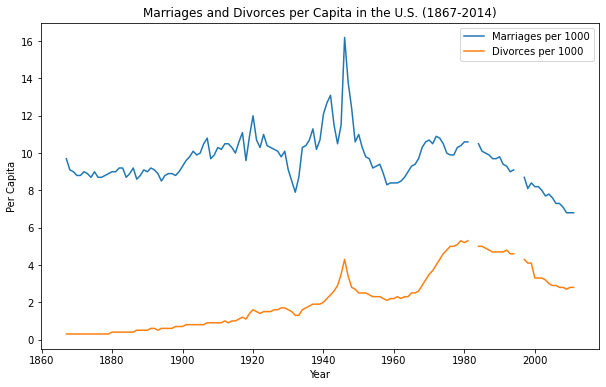

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'us-marriages-divorces-1867-2014.csv'  # Replace with the actual name of your CSV file
data = pd.read_csv(data_file)

plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

plt.legend()

plt.xlabel('Year')
plt.ylabel('Per Capita')

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.show()


# Question 7

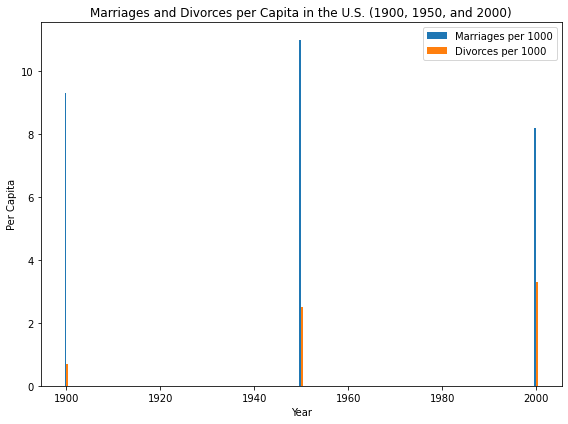

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


data_file = 'us-marriages-divorces-1867-2014.csv'  
data = pd.read_csv(data_file)

years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

plt.figure(figsize=(8, 6))  
bar_width = 0.4

plt.bar(filtered_data['Year'] - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000')

plt.bar(filtered_data['Year'] + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')

plt.legend()

plt.tight_layout()
plt.show()


# Question 8

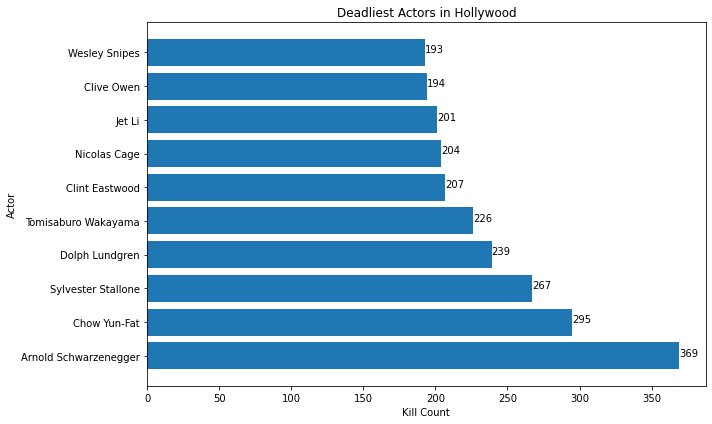

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


data_file = 'actor_kill_counts.csv'  
data = pd.read_csv(data_file)

data_sorted = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))  

plt.barh(data_sorted['Actor'], data_sorted['Count'])

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(data_sorted['Count']):
    plt.text(value, index, str(value))

plt.tight_layout()  
plt.show()


# Question 9

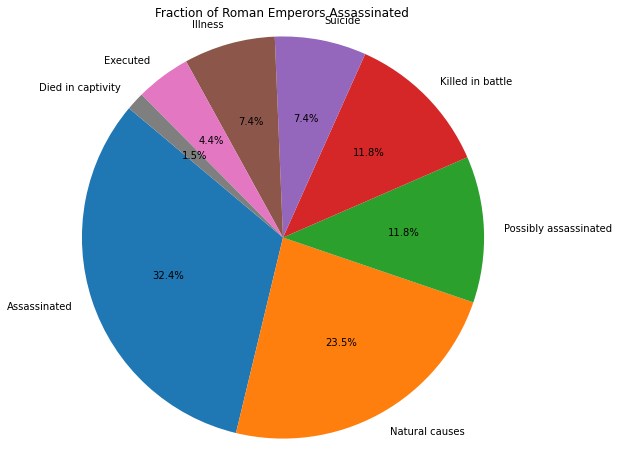

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'roman-emperor-reigns.csv' 
data = pd.read_csv(data_file)

cause_of_death_counts = data['Cause_of_Death'].value_counts()

plt.figure(figsize=(8, 8)) 

plt.pie(cause_of_death_counts, labels=cause_of_death_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Fraction of Roman Emperors Assassinated')

plt.axis('equal') 
plt.show()


# Question 10

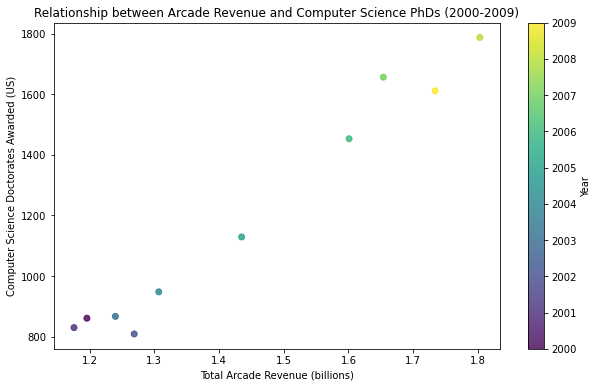

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'arcade-revenue-vs-cs-doctorates.csv'  
data = pd.read_csv(data_file)

data_filtered = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

plt.figure(figsize=(10, 6)) 

plt.scatter(data_filtered['Total Arcade Revenue (billions)'], data_filtered['Computer Science Doctorates Awarded (US)'],
            c=data_filtered['Year'], cmap='viridis', alpha=0.8)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')


cbar = plt.colorbar()
cbar.set_label('Year')

plt.show()
